In [32]:
import os
os.getcwd()

import pandas as pd
import numpy as np
from scipy import stats 

In [33]:
flanker = pd.read_excel("minalicen_flankerfish_childflankerfish_summary_2406301638.xlsx")
flanker.describe()


,groupId,sessionId,elapsedTime,completed,practice1ACC,practice2ACC,percenterrors,meanRT,percenterrors_c,meanrt_c,percenterrors_ic,meanrt_ic
count,1.740000e+02,173.000000,1.740000e+02,174.000000,170.000000,166.000000,170.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,4.726338e+08,1.034682,4.683232e+05,0.942529,0.941872,0.949297,4.200089,586.484856,2.730924,561.472079,5.122596,611.975634
std,2.992118e+08,0.183504,2.181291e+05,0.233413,0.115706,0.130647,10.888869,142.286865,10.264444,147.771416,12.031391,153.561528
min,9.919600e+05,1.000000,1.842900e+04,0.000000,0.000000,0.000000,0.000000,386.762712,0.000000,359.333333,0.000000,386.586207
25%,2.095554e+08,1.000000,4.358890e+05,1.000000,0.916667,0.916667,0.000000,488.725000,0.000000,459.166667,0.000000,510.850000
50%,4.245279e+08,1.000000,4.591285e+05,1.000000,1.000000,1.000000,1.666667,547.582471,0.000000,520.082051,0.000000,574.103448
75%,7.523494e+08,1.000000,4.880932e+05,1.000000,1.000000,1.000000,3.333333,637.957627,0.000000,604.298851,3.333333,664.775000
max,9.995826e+08,2.000000,3.003946e+06,1.000000,1.000000,1.000000,85.000000,1069.442308,93.333333,1127.300000,76.666667,1261.400000


In [34]:
# Select specific columns (Python index starts at 0, so column 5 is index 4, and columns 12 to 17 are indices 11 to 16)
flanker = flanker.iloc[:, [4, 7, 8, 11, 12, 13, 14, 15, 16]]


In [37]:
# Columns to check for outliers
columns_to_check = ['percenterrors', 'meanRT', 'percenterrors_c', 'meanrt_c', 'percenterrors_ic', 'meanrt_ic']

# Filter the DataFrame to only include rows where 'completed' == 1
completed_flanker = flanker[flanker['completed'] == 1]

# Calculate Z-scores for the selected columns in the filtered DataFrame
z_scores = np.abs(stats.zscore(completed_flanker[columns_to_check]))

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Identify rows with outliers in any of the selected columns
outlier_mask = (z_scores > threshold).any(axis=1)

# Initialize the 'outliers' column to 0
flanker['outliers'] = 0

# Update the 'outliers' column in the original DataFrame based on the filtered DataFrame's outlier_mask
flanker.loc[completed_flanker.index, 'outliers'] = np.where(outlier_mask, 1, 0)

# print the number of outliers detected
num_outliers = outlier_mask.sum()
print(f'Number of outliers detected: {num_outliers}')

# Display the DataFrame to verify
print(flanker.head())

Number of outliers detected: 8
  subjectId  elapsedTime  completed  percenterrors      meanRT  \
0   666jgdh       569677          1      85.000000  762.666667   
1   minal99       426716          1      21.666667  936.191489   
2   mhri388       428922          1       5.000000  558.508772   
3   Ajna888       523065          1       1.666667  548.711864   
4   Mars201       438810          1       0.000000  566.416667   

   percenterrors_c    meanrt_c  percenterrors_ic    meanrt_ic  outliers  
0        93.333333  441.500000         76.666667   854.428571         1  
1         6.666667  879.107143         36.666667  1020.315789         1  
2         3.333333  501.482759          6.666667   617.571429         0  
3         0.000000  522.100000          3.333333   576.241379         0  
4         0.000000  535.166667          0.000000   597.666667         0  


In [36]:
#descriptive statistics 
print(flanker.dtypes)
print(flanker.describe())


Number of outliers detected: 0


In [48]:
#getting just the appropriate data for analysis
df_f = flanker[flanker['completed'] == 1]
df_f = flanker[flanker['outliers'] == 0]
df_f = df_f.dropna(subset=columns_to_check)

In [49]:
from scipy.stats import ttest_rel, pearsonr

# Paired t-tests
ttest_rt = ttest_rel(df_f['meanrt_c'], df_f['meanrt_ic'])
ttest_errors = ttest_rel(df_f['percenterrors_c'], df_f['percenterrors_ic'])

print("\nPaired t-test for Reaction Times:")
print(f"t-statistic: {ttest_rt.statistic}, p-value: {ttest_rt.pvalue}")

print("\nPaired t-test for Error Rates:")
print(f"t-statistic: {ttest_errors.statistic}, p-value: {ttest_errors.pvalue}")

# Correlation analysis
corr_rt = pearsonr(df_f['meanrt_c'], df_f['meanrt_ic'])
corr_errors = pearsonr(df_f['percenterrors_c'], df_f['percenterrors_ic'])

print("\nCorrelation Analysis for Reaction Times:")
print(f"Correlation coefficient: {corr_rt[0]}, p-value: {corr_rt[1]}")

print("\nCorrelation Analysis for Error Rates:")
print(f"Correlation coefficient: {corr_errors[0]}, p-value: {corr_errors[1]}")


Paired t-test for Reaction Times:
t-statistic: -7.354085442534406, p-value: 1.0000153428453355e-11

Paired t-test for Error Rates:
t-statistic: -5.466399602515691, p-value: 1.7709562468030264e-07

Correlation Analysis for Reaction Times:
Correlation coefficient: 0.8116225697881414, p-value: 2.988470996646261e-38

Correlation Analysis for Error Rates:
Correlation coefficient: 0.8376327140357185, p-value: 8.157029113680902e-43


In [50]:
import os
os.getcwd()

'/Users/brigitamilanic/Documents/thesis'

In [52]:
#calculation of cogntive inhibition index for accuarcy and reaction time

# Define the formulas for CII_ACC and CII_RT
def calculate_cii_acc(percenterrors_c, percenterrors_ic):
    acc_c = 100 - percenterrors_c
    acc_ic = 100 - percenterrors_ic
    return 1 - (acc_c - acc_ic) / ((acc_c + acc_ic) / 2)

def calculate_cii_rt(meanrt_c, meanrt_ic):
    return 1 - abs(meanrt_ic - meanrt_c) / ((meanrt_ic + meanrt_c) / 2)

# Apply the formulas to each row in the DataFrame
df_f['CII_ACC'] = df_f.apply(lambda row: calculate_cii_acc(row['percenterrors_c'], row['percenterrors_ic']), axis=1)
df_f['CII_RT'] = df_f.apply(lambda row: calculate_cii_rt(row['meanrt_c'], row['meanrt_ic']), axis=1)

# Save the results to a new CSV file
# output_file_path = '/mnt/data/cii_results.csv'
# df_f.to_csv(output_file_path, index=False)

# Display the first few rows of the updated DataFrame
print(df_f.head())

  subjectId  elapsedTime  completed  percenterrors      meanRT  \
2   mhri388       428922          1       5.000000  558.508772   
3   Ajna888       523065          1       1.666667  548.711864   
4   Mars201       438810          1       0.000000  566.416667   
5   adef331       468925          1       0.000000  566.033333   
6   gf43gg1       473088          1       0.000000  664.350000   

   percenterrors_c    meanrt_c  percenterrors_ic   meanrt_ic  outliers  \
2         3.333333  501.482759          6.666667  617.571429         0   
3         0.000000  522.100000          3.333333  576.241379         0   
4         0.000000  535.166667          0.000000  597.666667         0   
5         0.000000  543.000000          0.000000  589.066667         0   
6         0.000000  671.366667          0.000000  657.333333         0   

    CII_ACC    CII_RT  
2  0.964912  0.792524  
3  0.966102  0.901412  
4  1.000000  0.889657  
5  1.000000  0.918615  
6  1.000000  0.978877  


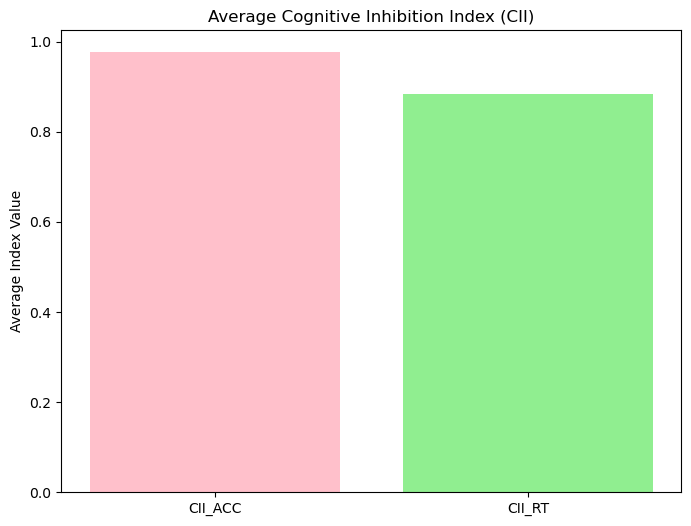

In [54]:
import matplotlib.pyplot as plt
# Calculate the average CII_ACC and CII_RT
average_cii_acc = df_f['CII_ACC'].mean()
average_cii_rt = df_f['CII_RT'].mean()

# Plot the average CII_ACC and CII_RT
labels = ['CII_ACC', 'CII_RT']
averages = [average_cii_acc, average_cii_rt]

plt.figure(figsize=(8, 6))
plt.bar(labels, averages, color=['pink', 'lightgreen'])
plt.ylabel('Average Index Value')
plt.title('Average Cognitive Inhibition Index (CII)')
plt.show()